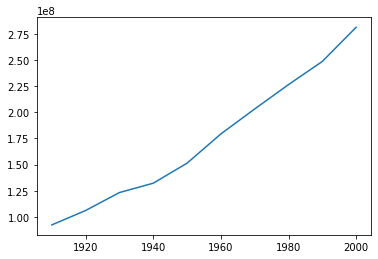

[[92228496.0,
  106021537.0,
  123202624.0,
  132164569.0,
  151325798.0,
  179323175.0,
  203211926.0,
  226545805.0,
  248709873.0,
  281421906.0],
 [0, 1, 2, 3, 4, 5, 6, 7, 8],
 [0, 1, 2, 3, 4, 5, 6, 7],
 [0, 1, 2, 3, 4, 5, 6],
 [0, 1, 2, 3, 4, 5],
 [0, 1, 2, 3, 4],
 [0, 1, 2, 3],
 [0, 1, 2],
 [0, 1],
 [0]]

In [7]:
import matplotlib.pyplot as p
import math as mt
import numpy as np
r = 10
h = 10.
x = [1910.,
     1920.,
     1930.,
     1940.,
     1950.,
     1960.,
     1970.,
     1980.,
     1990.,
     2000.]
d = [list(range(i)) for i in range(1, r + 1)][::-1]
d[0] = [92228496.,
     106021537.,
     123202624.,
     132164569.,
     151325798.,
     179323175.,
     203211926.,
     226545805.,
     248709873.,
     281421906.]
p.plot(x, d[0])
p.show()
d

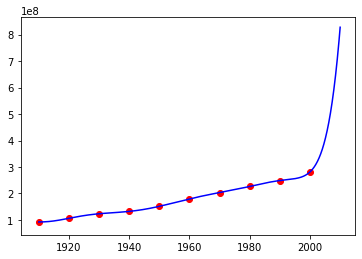

Polinom value:  827906509
True value:  308745538
---------> 3999 1949.99399939994
---------> 4000 1950.00400040004
---------> 4001 1950.01400140014
---------> 4002 1950.02400240024
---------> 4003 1950.03400340034
---------> 4004 1950.0440044004401
---------> 4005 1950.05400540054
---------> 4006 1950.06400640064
---------> 4007 1950.0740074007401
---------> 4008 1950.08400840084
---------> 4009 1950.0940094009402
---------> 4010 1950.1040104010401
Proizvodnaya in 1950 year:  2605027.574725253


In [27]:
for a in range(r - 1):
    for b in range(r - 1 - a):
        d[a + 1][b] = (d[a][b + 1] - d[a][b]) / (x[b + 1 + a] - x[b])
def polinom(a, d):
    p = 0
    tmp = 1
    for i in range(r):
        for m in range (i):
            tmp *= (a - x[m])
        p += tmp*d[i][0]
        tmp = 1
    return p
ax = np.linspace(x[0], x[len(x) - 1] + 10, 10000)
pp = np.array(ax)
for i in range(len(ax)):
    pp[i] = polinom(ax[i], d)
p.plot(ax, pp, color = 'b')
#p.plot(x, d[0], color = 'r')
p.scatter(x, d[0], color = 'r')
p.show()
print ('Polinom value: ', int(pp[len(pp) - 1]))
print ('True value: ',308745538)

for i in range(len(ax)):
    if (ax[i] > 1949.99 and ax[i] < 1950.11):
        print('--------->', i, ax[i]);
        
print('Proizvodnaya in 1950 year: ',(pp[4000] - pp[3999])/(ax[4000] - ax[3999]));

In [10]:
# S[i](ax)= a[i] + b[i]*(ax - x[i]) + c[i]*(ax - x[i])^2 + d[i]*(ax - x[i])^3
# S[i](x[i]) = a[i], S'[i](x[i]) = b[i], S"[i](x[i]) = 2c[i]
# f[i] = d[0][i]
# a[i] = f[i], d[i]= = (c[i] - c[i-1])/3/h[i], b[i] = (a[i] - a[i-1])/h[i] + (2*c[i] + c[i-1])/3*h[i]
# c[i-1]*h[i] + 2*c[i]*(h[i] + h[i+1]) + c[i+1]*h[i+1] = 3*((a[i+1] - a[i])/h[i+1] - (a[i] - a[i-1])/h[i])
# c[r-1] = 0, c[0] - 3*d[0]*h[0] = 0
# Метод прогонки: (for c)
# A[i]*c[i-1] + C[i]*x[i] + B[i]*c[i+1] = F[i]
# aa[i+1] = -B[i]/(A[i]*aa[i] + C[i])
# bb[i+1] = (F[i] - A[i]*B[i])/(A[i]*aa[i] + C[i])
# aa[0] = 0, bb[0] = 0
# c[r-1] = (F[r-1] - A[r-1]*bb[r-1])/(C[r-1] - A[r-1]*aa[r-1])
# c[i] = aa[i+1]*c[i+1] + bb[i+1]

In [13]:
a = list(range(r))
b = list(range(r-1))
c = list(range(r-1))
d = list(range(r-1))
aa = list(range(r-1))
bb = list(range(r-1))
A = list(range(r-2))
B = list(range(r-2))
C = list(range(r-2))
F = list(range(r-2))
for i in range(r):
    a[i] = x[i]
for i in range(r-2):
    A[i] = B[i] = h
    C[i] = 2*h
    F[i] = 